# Image pre-processing

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
from LOW_LEVEL_UTILITIES.utilities import show_batch,save_obj,load_obj

import os
import PIL.Image
import numpy as np
from skimage import data
import torch

from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from skimage.transform import resize
from skimage.morphology import reconstruction
   

def normalize(data):
    data_max = np.max(data)
    data_min = np.min(data)
    return (data-data_min)/(data_max-data_min)

def deconvolve(data,iterations=3,psf=None):
    if(psf is None):
        psf = np.ones((5, 5)) / 25
    return restoration.richardson_lucy(data, psf, iterations=iterations)

def subtract_background(data):
    image = gaussian_filter(data, 1)
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image
    dilated = reconstruction(seed, mask, method='dilation')
    return data-dilated

def proprecessing(original_data):
    data = normalize(original_data)
    data = deconvolve(data,iterations=1,psf=np.ones((10, 10)) / 100)
    data = subtract_background(data)
    return normalize(data)

def crop_in_4(data):    
    batch,ch,width, height = data.shape
    dx = int(0.5*width)
    dy = int(0.5*height)
    
    new_data = torch.zeros_like(data).view(4,batch,ch,dx,dy)

    l=0
    for nx in range(0,2):
        for ny in range(0,2):
            new_data[l,:,:,:,:]=data[:,:,nx*dx:(nx+1)*dx,ny*dy:(ny+1)*dy]
            l = l+1
    return new_data.view(-1,ch,dx,dy)

def np_2_torch(data):
    if(len(data.shape)==2):
        return torch.from_numpy(data)[None,None,...] 
    else:
        raise NotImplementedError
        
def pipeline(read_dir,write_dir,file_name):
    img_name = read_dir+file_name+'.png'
    img = PIL.Image.open(img_name, mode='r')
    img = img.resize((256,256), resample=PIL.Image.BILINEAR)
    data = np.array(img , dtype='float')
    data  = normalize(data)
    data = np_2_torch(data) 
    data = crop_in_4(data) 
    save_obj(data,write_dir,file_name+"_processed")
    
    return data

# TRIAL

torch.Size([4, 1, 128, 128])
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64)


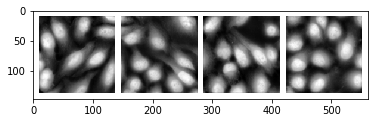

In [63]:
read_dir = '/dsde/working/ldalessi/single-cell/MERFISH_dapi_only/'
write_dir = '/dsde/working/ldalessi/single-cell/MERFISH_dapi_processed/'
file_name = 'fov_67'

data = pipeline(read_dir,write_dir,file_name)
print(data.shape)
print(torch.min(data),torch.max(data))
show_batch(data)

In [62]:
#,cmap='gray', vmin=0, vmax=1.0)

# APPLY THE SAME PROCESSING TO ALL FILES

In [74]:
list_of_files = list()
for file in os.listdir(read_dir):
    if file.endswith(".png") and file.startswith("fov_"):
        list_of_files.append(file.strip(".png"))
        
#print(list_of_files)
print("len(list_of_files)",len(list_of_files))

496


In [65]:
N = len(list_of_files)
l = 0 
for file_name in list_of_files:
    l=l+1
    try:
        _ = pipeline(read_dir,write_dir,file_name)
        print(file_name,l,"out of ",N)    
    except:
        pass

fov_50 1 out of  496
fov_68 2 out of  496
fov_367 3 out of  496
fov_102 4 out of  496
fov_268 5 out of  496
fov_295 6 out of  496
fov_130 7 out of  496
fov_43 8 out of  496
fov_223 9 out of  496
fov_184 10 out of  496
fov_320 11 out of  496
fov_348 12 out of  496
fov_189 13 out of  496
fov_408 14 out of  496
fov_159 15 out of  496
fov_475 16 out of  496
fov_218 17 out of  496
fov_73 18 out of  496
fov_234 19 out of  496
fov_203 20 out of  496
fov_124 21 out of  496
fov_317 22 out of  496
fov_368 23 out of  496
fov_145 24 out of  496
fov_433 25 out of  496
fov_190 26 out of  496
fov_209 27 out of  496
fov_128 28 out of  496
fov_447 29 out of  496
fov_23 30 out of  496
fov_239 31 out of  496
fov_70 32 out of  496
fov_4 33 out of  496
fov_167 34 out of  496
fov_323 35 out of  496
fov_352 36 out of  496
fov_154 37 out of  496
fov_192 38 out of  496
fov_351 39 out of  496
fov_334 40 out of  496
fov_324 41 out of  496
fov_282 42 out of  496
fov_436 43 out of  496
fov_58 44 out of  496
fov_17

fov_369 351 out of  496
fov_414 352 out of  496
fov_149 353 out of  496
fov_243 354 out of  496
fov_185 355 out of  496
fov_150 356 out of  496
fov_416 357 out of  496
fov_434 358 out of  496
fov_196 359 out of  496
fov_284 360 out of  496
fov_110 361 out of  496
fov_299 362 out of  496
fov_206 363 out of  496
fov_313 364 out of  496
fov_303 365 out of  496
fov_426 366 out of  496
fov_81 367 out of  496
fov_20 368 out of  496
fov_162 369 out of  496
fov_354 370 out of  496
fov_172 371 out of  496
fov_137 372 out of  496
fov_405 373 out of  496
fov_221 374 out of  496
fov_237 375 out of  496
fov_366 376 out of  496
fov_406 377 out of  496
fov_1 378 out of  496
fov_143 379 out of  496
fov_393 380 out of  496
fov_120 381 out of  496
fov_481 382 out of  496
fov_365 383 out of  496
fov_294 384 out of  496
fov_455 385 out of  496
fov_395 386 out of  496
fov_314 387 out of  496
fov_174 388 out of  496
fov_389 389 out of  496
fov_357 390 out of  496
fov_267 391 out of  496
fov_57 392 out of  4

# Create two big torch.tensor (train and test datasets)

In [75]:
list_of_pkl_files = list()
for file in os.listdir(write_dir):
    if file.endswith("processed.pkl") and file.startswith("fov_"):
        list_of_pkl_files.append(file.strip(".pkl"))

N=len(list_of_pkl_files)
N_TRAIN = int(0.85*N)
N_TEST = N-N_TRAIN
print(N,N_TRAIN,N_TEST)

test_data = load_obj(write_dir,list_of_pkl_files[0])
batch_size, ch, width, height = test_data.shape
print(torch.min(test_data),torch.max(test_data))

496 421 75
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64)


In [72]:
dataset_train = torch.zeros([N_TRAIN,batch_size, ch, width, height], dtype=torch.float)
dataset_test  = torch.zeros([N_TEST,batch_size, ch, width, height], dtype=torch.float)

for n in range(0,N):
    data = load_obj(dir_processed_img,list_of_pkl_files[n])
    if(n<N_TRAIN):
        dataset_train[n,...] = data.float()
    else:
        dataset_test[n-N_TRAIN,...] = data.float()

save_obj(dataset_train.view(-1,ch,width,height),write_dir,"DAPI_dataset_train")
save_obj(dataset_test.view(-1,ch,width,height),write_dir,"DAPI_dataset_test")